# Load in the DataFrame

In [204]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Create your df here:
df = pd.read_csv("profiles.csv")

# Explore the data

In [205]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [206]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

# Predict income with some combination of drinking_habit, job_status, gender, age, average length of essays, and education_level?

# Augment Data

In [207]:
gender_mapping= {"m": 0, "f": 1}
df["gender_code"] = df.sex.map(gender_mapping)

In [208]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4",
              "essay5","essay6","essay7","essay8","essay9"]
# removing the nan  in essay_cols
df[essay_cols] = df[essay_cols].replace(np.nan, '', regex=True)

In [209]:
# combine the essays
all_essays = df[essay_cols].apply(lambda x: ' '.join(x), axis=1)
# create a column to store the average length of essays
df['essay_ave_len'] = all_essays.apply(lambda x: len(x)/len(essay_cols))


# Group locations by states

In [210]:
df['location_by_state'] = df.location.apply(lambda x: x.split(',')[1])

In [211]:
df.location_by_state.value_counts()

 california              59855
 new york                   17
 illinois                    8
 massachusetts               5
 texas                       4
 michigan                    4
 oregon                      4
 florida                     3
 arizona                     3
 minnesota                   2
 colorado                    2
 washington                  2
 united kingdom              2
 district of columbia        2
 hawaii                      2
 virginia                    2
 ohio                        2
 utah                        2
 georgia                     2
 spain                       2
 connecticut                 1
 missouri                    1
 nevada                      1
 tennessee                   1
 idaho                       1
 mexico                      1
 west virginia               1
 germany                     1
 british columbia            1
 montana                     1
 wisconsin                   1
 pennsylvania                1
 new jer

In [212]:
states=df.location_by_state.unique()

In [213]:
states_mapping={state:i for i,state in enumerate(states)}

In [214]:
df["state_code"] = df.location_by_state.map(states_mapping)

# Define Job Status

We will categorise job status to the following groups: 
* unemployed
* student
* retired
* military
* employed

In [215]:
employed=[x for x in df.job.values if x not in 
           ['unemployed', 'student', 'retired', 'military']]

In [216]:
job_mapping= {'unemployed':0, 'student':1, 'retired':2, 'military': 3}
for x in employed: 
    job_mapping[x]=4
df["job_status_code"] = df.job.map(job_mapping)

# Define Education levels

We will regroup education levels to the following categories: 
* Post graduate degree
* College graduate  
* law_or_med_school
* Some college            
* High school
* less_than_high_school

In [217]:
post_graduate=['graduated from masters program', 
              'graduated from ph.d program',
               'masters program', 
               'ph.d program',
              ]

In [218]:
college_graduate=['graduated from college/university',
                  'working on masters program',
                  'graduated from two-year college',
                  'working on ph.d program',
                  'dropped out of masters program',
                  'dropped out of ph.d program',
                  'college/university'
                 ]

In [219]:
law_or_med_school=[ 'graduated from law school',
                   'graduated from med school', 
                  ]

In [220]:
some_college=['working on college/university',
             'working on two-year college',
              'working on law school',
              'two-year college',
              'working on med school'
              , 'law school',
              'med school'
             ]

In [221]:
high_school=['graduated from high school',
                    'dropped out of college/university',
                    
                     'dropped out of two-year college',
            
                     'high school',
                     
                     
                     'dropped out of law school',
                     'dropped out of med school'
                     
                    ]

In [222]:
less_than_high_school=['graduated from space camp',
                     'dropped out of space camp',
                     'working on space camp',
                      'dropped out of high school',
                       'working on high school',
                       'space camp'
                      ]

In [223]:
education_mapping = {}
for x in post_graduate: 
    education_mapping[x]=5
for x in law_or_med_school: 
    education_mapping[x]=4     
for x in college_graduate: 
    education_mapping[x]=3 
for x in some_college:
    education_mapping[x]=2
for x in high_school: 
    education_mapping[x]=1
for x in less_than_high_school: 
    education_mapping[x]=0

In [224]:
df["education_level"] = df.education.map(education_mapping)

In [225]:
df.education_level.value_counts()

3.0    29224
5.0    10395
2.0     7519
1.0     2740
0.0     1872
4.0     1568
Name: education_level, dtype: int64

# Define drink mapping

In [226]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

# Drop NA

In [227]:
all_data=df.dropna(subset=['drinks_code', 'job_status_code','height',
                           'gender_code','age','education_level',
                           'essay_ave_len', 'income', 'location_by_state'])

What is the average income of females and males respectively? 

```python
df[df['column_we_know'] == 'value_we_know']['column_we_want']
```

In [228]:
all_data[all_data['sex']=='f']['income'].describe()

count      21017.000000
mean       12104.577675
std        77326.303858
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [229]:
all_data[all_data['sex']=='m']['income'].describe()

count      30511.000000
mean       27564.064239
std       112122.036999
min           -1.000000
25%           -1.000000
50%           -1.000000
75%        20000.000000
max      1000000.000000
Name: income, dtype: float64

## Exploratory Analysis

Let's investigate some of the different features to see what might correlate most with our dependent variable, the `income`. The features with the best correlations could prove to be the most helpful for our Linear Regression model! 

In [230]:
all_data.corr()['income']

age               -0.000736
height             0.066504
income             1.000000
gender_code       -0.076203
essay_ave_len      0.008410
state_code        -0.003715
job_status_code    0.006826
education_level   -0.052510
drinks_code        0.043189
Name: income, dtype: float64

In [231]:
correlation=all_data.corr()['income']

In [232]:
sorted(list(correlation.items()),key = lambda x: abs(x[1]), reverse=True)

[('income', 1.0),
 ('gender_code', -0.076203017601154),
 ('height', 0.06650448229204804),
 ('education_level', -0.0525100512892988),
 ('drinks_code', 0.043188895367804014),
 ('essay_ave_len', 0.008409571460730797),
 ('job_status_code', 0.006825694676601756),
 ('state_code', -0.003714801363616364),
 ('age', -0.000735972383885734)]

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on.

In [233]:
features=all_data[['gender_code', 'education_level']]
income=all_data['income']

In [234]:
## Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    income, 
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state=1)

## Create and Train the Model
model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways.

In [235]:
model.score(X_train, y_train)

0.007923178845932743

In [236]:
model.score(X_test, y_test)

0.007676604347903515

# We can take a look at the coefficients on our different features! The following is a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [237]:
sorted(list(zip(['gender_code', 'education_level'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)


[('gender_code', -15141.210630850219), ('education_level', -3343.895436252767)]

In [238]:
model.coef_

array([-15141.21063085,  -3343.89543625])

# Lastly we can calculate the predicted incomes for our testing data and compare them to their actual incomes! 

In [239]:
y_predicted=model.predict(X_test)

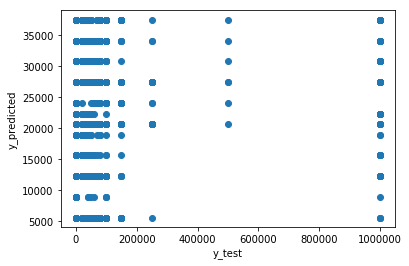

In [240]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_predicted)
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.show()

 For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. 
 In this case, it is not. We call this model heteroscedastic. 

## Define Different Subsets of Data

After evaluating the first model, we see that `gender_code` and `education_level` alone are not the best predictors for heights. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model!

In [241]:
# subset of all features that have a response range [0,1]
binary_features = ['gender_code']

# subset of all features that vary on a greater range than [0,1]
numeric_features = ['height','education_level', 'drinks_code', 
                    'job_status_code', 'age', 
                    'essay_ave_len', 'state_code']
# all features
all_features = binary_features + numeric_features

# top 3 features with high correlation with income
feature_subset =  ['gender_code', 'height', 'education_level']

# features with correlation above 0.01
feature_subset2=['gender_code', 'height','education_level', 'drinks_code']

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process you just completed with our first model! Take some time to review how the function works, analyzing it line by line. Fill in the empty comments with an explanation of the task the code beneath it is performing.

In [242]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_to_predict, feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data

    to_predict = all_data.loc[:,feature_to_predict]
    features = all_data.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, to_predict, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
   # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel(feature_to_predict)
    plt.ylabel('Predicted'+ feature_to_predict)
    
    plt.show()

Train Score: 0.006242377102086195
Test Score: 0.004057631870889922
[('gender_code', -15795.945119311475)]


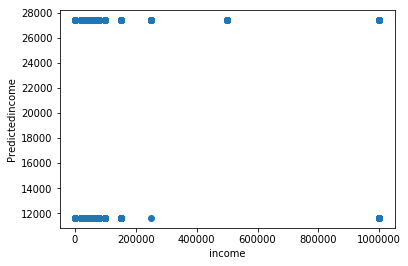

In [243]:
model_these_features('income', binary_features)

Train Score: 0.008330612491716294
Test Score: 0.01145727871662483
[('drinks_code', 5720.028675709022), ('education_level', -4145.559360111984), ('height', 1530.6196176240396), ('job_status_code', 899.6486438362446), ('state_code', -763.3583909795452), ('age', 187.20625172769934), ('essay_ave_len', 5.3905925628484335)]


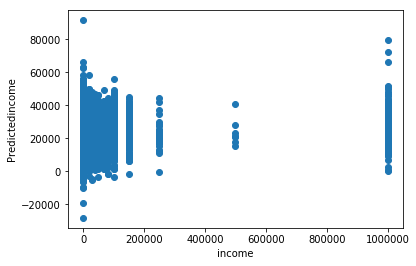

In [244]:
model_these_features('income', numeric_features)

Train Score: 0.010448126913540356
Test Score: 0.011539932578074286
[('gender_code', -12212.88829795847), ('drinks_code', 5887.915168725661), ('education_level', -3913.4028028192297), ('job_status_code', 824.0545666390291), ('state_code', -719.49631339124), ('height', 545.8442281242237), ('age', 199.46462004908398), ('essay_ave_len', 5.573748122198177)]


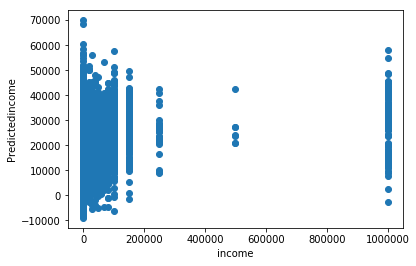

In [245]:
model_these_features('income', all_features)

Train Score: 0.008276362558189643
Test Score: 0.008594499128849464
[('gender_code', -11879.558448709242), ('education_level', -3356.2606803384015), ('height', 613.9586509266325)]


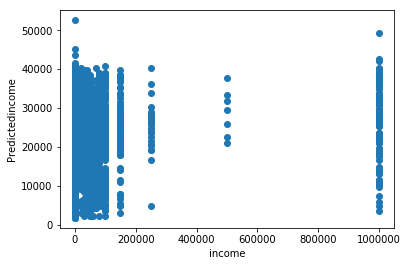

In [246]:
model_these_features('income', feature_subset)

Train Score: 0.009801162760960436
Test Score: 0.011119712194645024
[('gender_code', -12103.436053738304), ('drinks_code', 5522.1640562426055), ('education_level', -3376.971511104213), ('height', 559.3558757968922)]


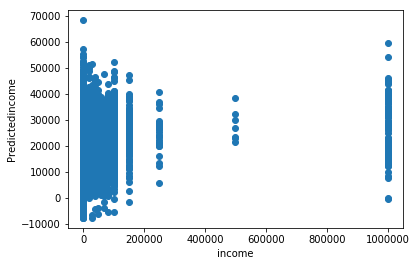

In [247]:
model_these_features('income', feature_subset2)

# It appears that all of our regression model has weak score.
# We can conclude that our features are not sufficient to model income with reasonable accuracy.